# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

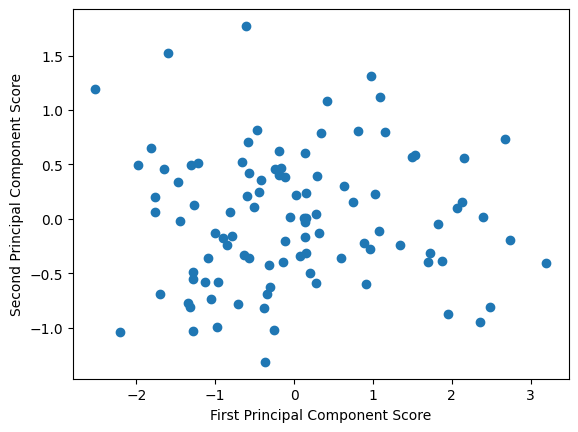

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

#### Dataset 1: Marketing Campaign Dataset
##### Heatmaps:

In [2]:
import seaborn as sns
#load dataset
marketing_campaign = pd.read_csv("marketing_campaign.csv", sep=';')
marketing_campaign.dropna(inplace=True)
marketing_campaign = marketing_campaign.drop(columns=['Z_CostContact', 'Z_Revenue']) 
marketing_campaign.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,20,1,0,0,0,0,0,0


In [3]:
#useful for analyzing customer behavior by age group
marketing_campaign['Age'] = 2025 - marketing_campaign['Year_Birth'] #calculate age
#make age bins
marketing_campaign['Age_Group'] = pd.cut(marketing_campaign['Age'], bins = [18, 30, 40, 50, 60, 80], labels=['18-30', '31-40', '41-50', '51-60', '61+'])
#combine amount spent across all categories to find total spend
spend_cat = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
marketing_campaign['Total_Spend'] = marketing_campaign[spend_cat].sum(axis=1)
#group and aggregate spending
age_spend = marketing_campaign.groupby('Age_Group', observed=True)[['Total_Spend']].mean()

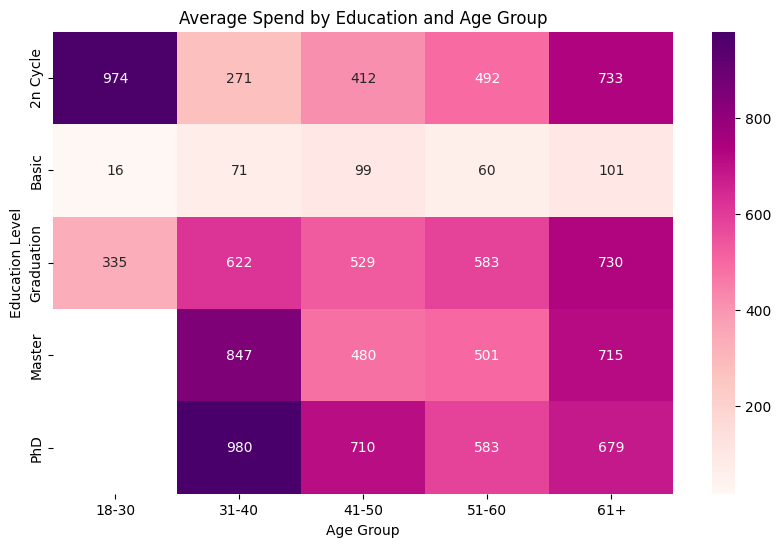

In [4]:
#heatmap: average spending by education level and age group
pivot1 = marketing_campaign.pivot_table(
    values='Total_Spend',
    index='Education',
    columns='Age_Group',
    aggfunc='mean',
    observed=False)
plt.figure(figsize=(10,6))
sns.heatmap(pivot1, annot=True, fmt='.0f', cmap='RdPu')
plt.title("Average Spend by Education and Age Group")
plt.ylabel("Education Level")
plt.xlabel("Age Group")
plt.show()

blurb abt findings

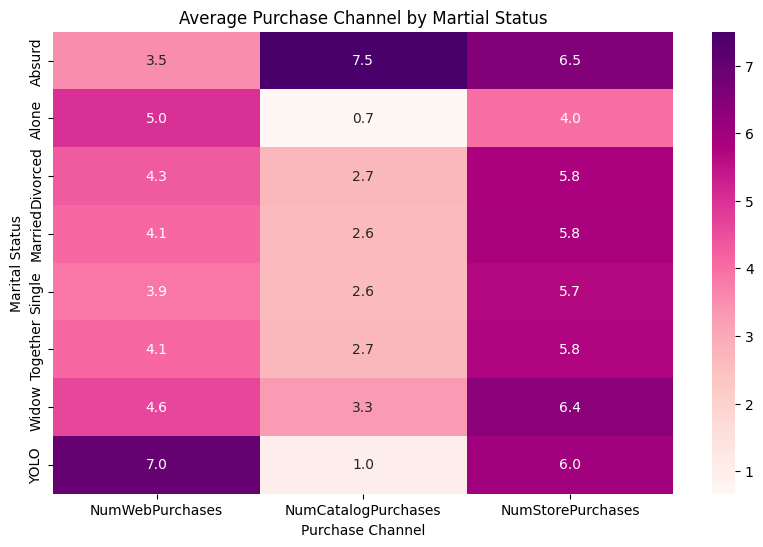

In [5]:
#heatmap: purchase channel by marital status
channels=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
pivot2 = marketing_campaign.groupby('Marital_Status')[channels].mean()
plt.figure(figsize=(10,6))
sns.heatmap(pivot2, annot=True, fmt='.1f', cmap='RdPu')
plt.title("Average Purchase Channel by Martial Status")
plt.xlabel("Purchase Channel")
plt.ylabel("Marital Status")
plt.show()

blurb abt findings

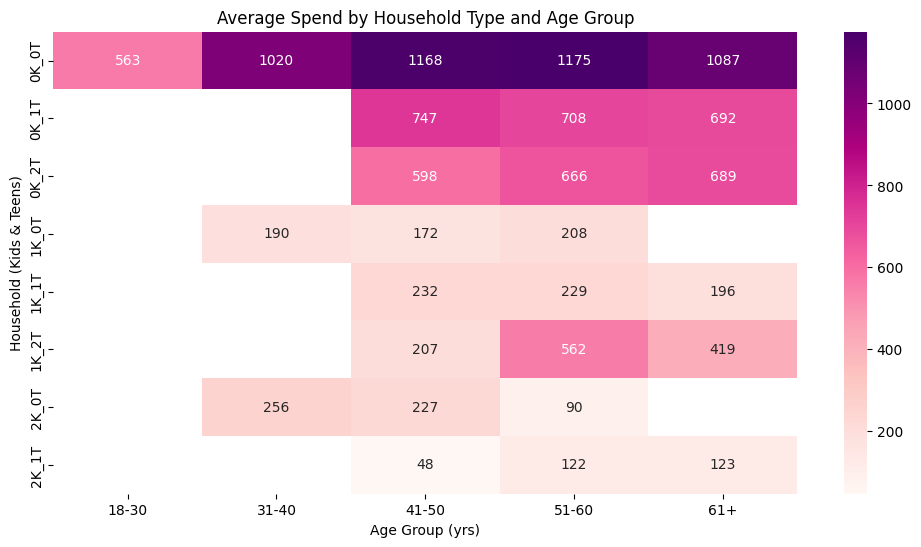

In [6]:
#heatmap: avg spend by household type (family structure/kids/teens)
channels=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
marketing_campaign['Household_Type'] = marketing_campaign['Kidhome'].astype(str) + "K_" + marketing_campaign['Teenhome'].astype(str) + "T"
pivot3 = marketing_campaign.pivot_table(
    values='Total_Spend',
    index='Household_Type',
    columns='Age_Group',
    aggfunc='mean',
    observed=False)
plt.figure(figsize=(12,6))
sns.heatmap(pivot3, annot=True, fmt='.0f', cmap='RdPu')
plt.title("Average Spend by Household Type and Age Group")
plt.xlabel("Age Group (yrs)")
plt.ylabel("Household (Kids & Teens)")
plt.show()

blurb about findings

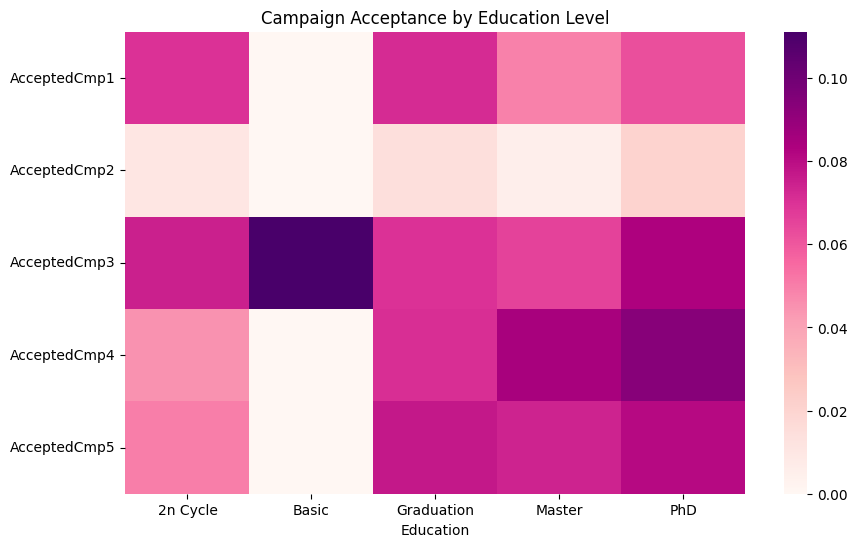

In [7]:
#campaign response by education level
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
edu_response = marketing_campaign.groupby('Education', observed=True)[campaign_cols].mean()
#plot
plt.figure(figsize=(10, 6))
sns.heatmap(edu_response.T, cmap='RdPu')
plt.title("Campaign Acceptance by Education Level")
plt.show()

blurb about findings

##### Bubble plots:

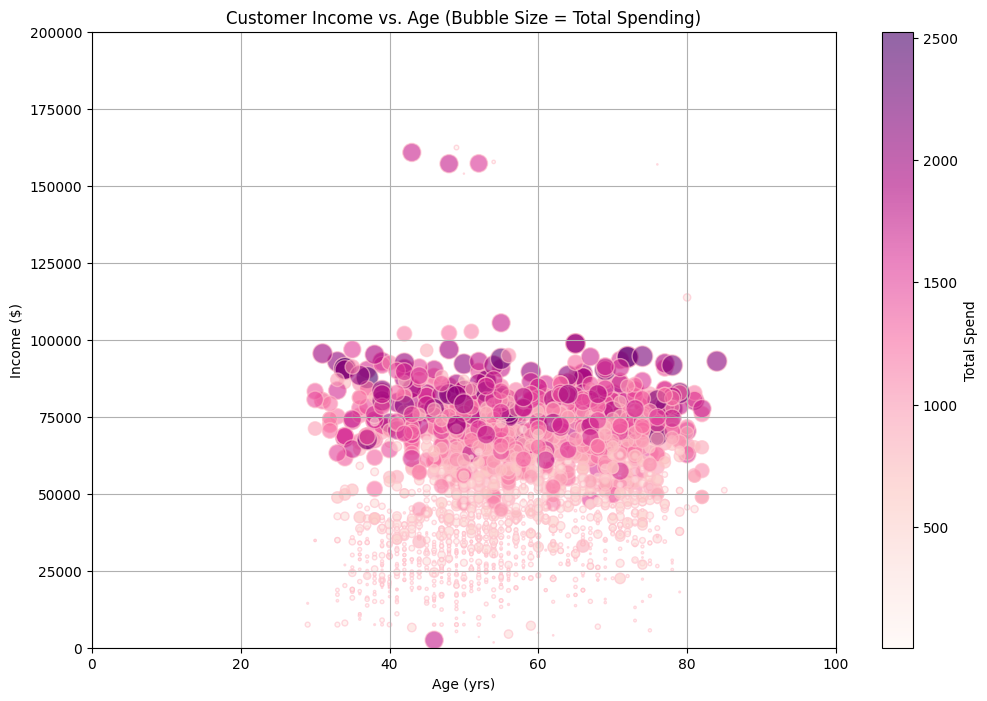

In [8]:
#bubble plot: age vs income, bubble size -> total spend
plt.figure(figsize=(12,8))
plt.scatter(
    marketing_campaign['Age'],
    marketing_campaign['Income'],
    s=marketing_campaign['Total_Spend']/10, #scale down for visibility
    c=marketing_campaign['Total_Spend'],
    cmap='RdPu',
    alpha=0.6,
    edgecolors='pink')
plt.colorbar(label='Total Spend')
plt.title('Customer Income vs. Age (Bubble Size = Total Spending)')
plt.xlabel('Age (yrs)')
plt.ylabel('Income ($)')
plt.ylim(0, 200000)
plt.xlim(0, 100)
plt.grid(True)
plt.show()

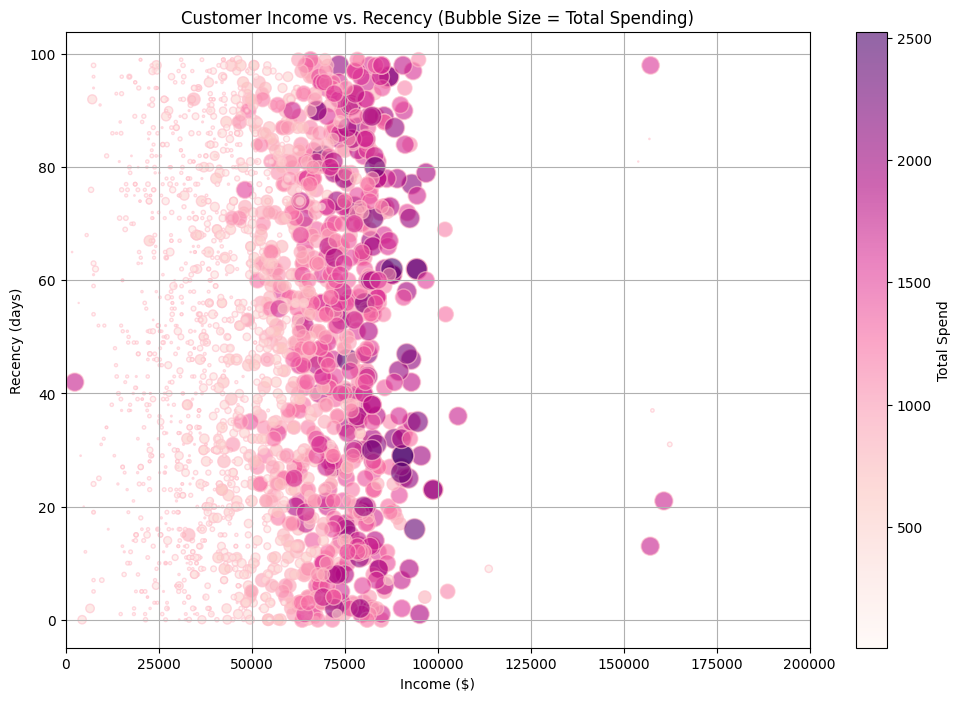

In [9]:
#bubble plot: income vs recency, bubble size -> total spend
plt.figure(figsize=(12,8))
plt.scatter(
    marketing_campaign['Income'],
    marketing_campaign['Recency'],
    s=marketing_campaign['Total_Spend']/10, #scale down for visibility
    c=marketing_campaign['Total_Spend'],
    cmap='RdPu',
    alpha=0.6,
    edgecolors='pink'
)
plt.colorbar(label='Total Spend')
plt.title('Customer Income vs. Recency (Bubble Size = Total Spending)')
plt.xlabel('Income ($)')
plt.ylabel('Recency (days)')
plt.xlim(0, 200000)
plt.grid(True)
plt.show()

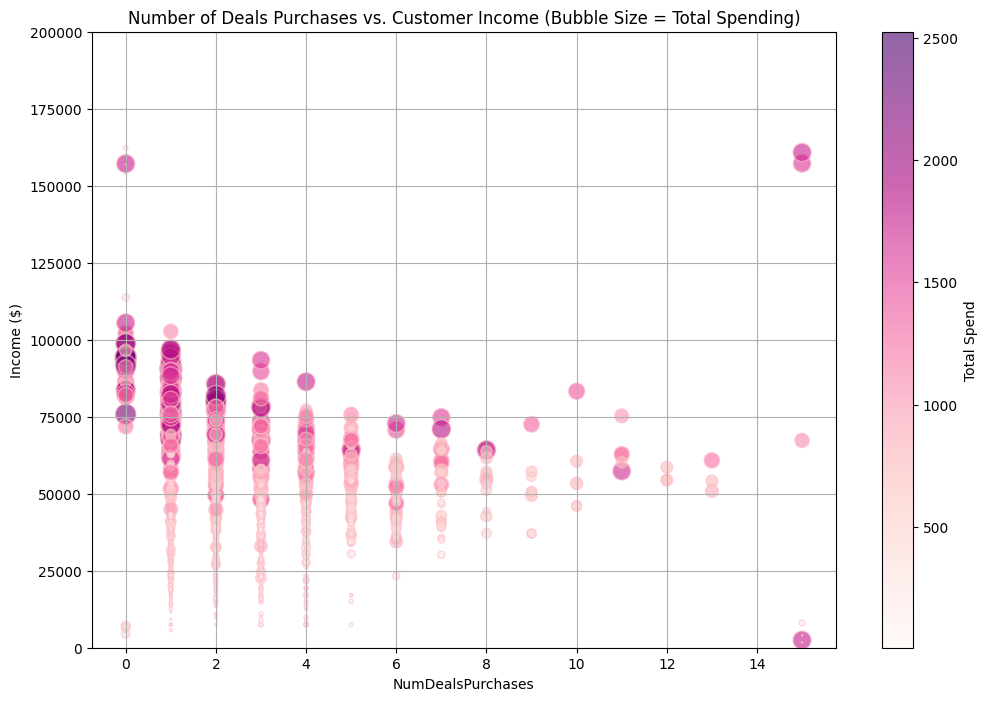

In [10]:
#bubble plot: numdealspurchases vs income, bubble size -> total spend
plt.figure(figsize=(12,8))
plt.scatter(
    marketing_campaign['NumDealsPurchases'],
    marketing_campaign['Income'],
    s=marketing_campaign['Total_Spend']/10, #scale down for visibility
    c=marketing_campaign['Total_Spend'],
    cmap='RdPu',
    alpha=0.6,
    edgecolors='pink'
)
plt.colorbar(label='Total Spend')
plt.title('Number of Deals Purchases vs. Customer Income (Bubble Size = Total Spending)')
plt.xlabel('NumDealsPurchases')
plt.ylabel('Income ($)')
plt.ylim(0, 200000)
plt.grid(True)
plt.show()

##### PCA:

Variance explained by first PCA:  29.87%


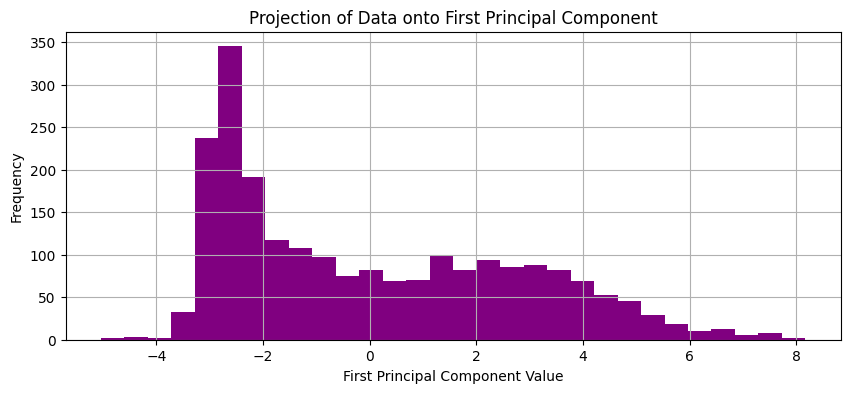

In [11]:
#pca code
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#select numeric cols for pca
num_cols = marketing_campaign.select_dtypes(include=['int64', 'float64']).drop(columns='ID')
X = num_cols.copy()
#standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
#explained variance
explain_var = pca.explained_variance_ratio_
first_pc_var = explain_var[0]
print(f"Variance explained by first PCA: {first_pc_var * 100: .2f}%")
#plot projection onto first PC
first_pc_proj = X_pca[:, 0]
plt.figure(figsize=(10,4))
plt.hist(first_pc_proj, bins=30, color='purple')
plt.title("Projection of Data onto First Principal Component")
plt.xlabel("First Principal Component Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
#loadings for each feature on each component
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=X.columns  # original feature names
)

# Show top contributors to PC1
print("Top features contributing to PC1:")
print(loadings['PC1'].sort_values(key=abs, ascending=False).head(10))

Top features contributing to PC1:
Total_Spend            0.349600
NumCatalogPurchases    0.298624
MntMeatProducts        0.297107
MntWines               0.294709
Income                 0.271454
NumStorePurchases      0.264655
MntFishProducts        0.255935
MntSweetProducts       0.248476
MntFruits              0.246239
Kidhome               -0.237381
Name: PC1, dtype: float64


Answer: 

The directions in which the data varies
* The first principal component shows a direction where spending and purchasing behavior are strong drivers. Total_Spend is the strongest contributer to PC1, showing that the total customer spending is the main axis of variation. NumCatalogPurchases tells us that customers who buy via catalogs tend to drive PC1. Income also plays a big role, with those with higher income being more likely to be high on PC1. The top negative contirbutor is Kidhome, suggesting that households with kids may spend less overall or have different spending patterns. 

Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?
* The first principal component alone captures only 28.44% of the total variance of the stndardized marketing campaign dataset. This is not enough to perform the entire dataset on its own, but it is significant enough to show a dominant trend and direction in how the data varies. The remaining variance is spread across other components, so using only PC1 would be a lossy compression, but still useful enough for broad pattern detection.

To see how many components are needed to capture most of the variance, I will plot the cumulative explained variance:

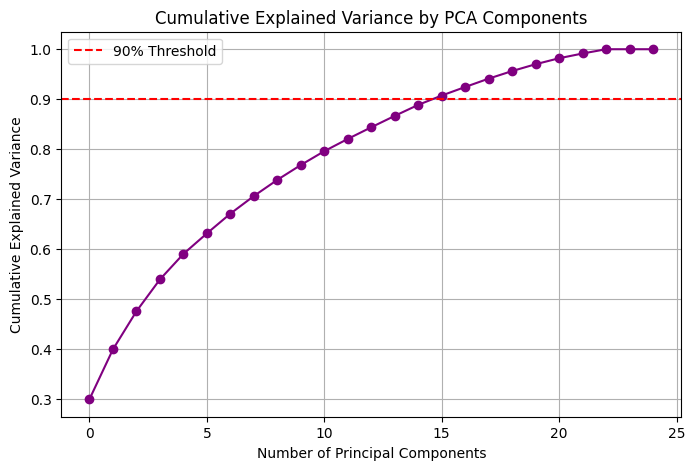

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explain_var), marker='o', color='purple')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')
plt.legend()
plt.show()

Here we see that to capture 90% of the variance, ~15 principal components would have to be used. A range of 40-60% variance captured might be best, which would require ~1-5 principal components

##### Linear Regression: (using different sets of features)
Although the dataset's original target variable is Response, my linear regression analyses will focus on exploring which features most effectively predict other continuous attributes. This will help me highlight and assess feature importance, feature relationships, and identify potential predictors for campaign responsiveness and consumer behavior. 

First, I explored predicting how much an individual will spend across all categories (Total_Spend):

In [14]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#Predict how much someone spends
def try_regression(X, y, desc=''): #create linear regression model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"Model {desc}: R² = {score:.4f}")
#define demographic+behavioral features
demo = ['Age', 'Income', 'Kidhome', 'Teenhome']
behav = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']
combined = demo+behav
#test using demographic features
X_demo = marketing_campaign[demo]
y_ts = marketing_campaign['Total_Spend']
try_regression(X_demo, y_ts, desc='Demographic Features Only')

Model Demographic Features Only: R² = 0.6108


In [15]:
#test using behavioral features
X_beh = marketing_campaign[behav]
try_regression(X_beh, y_ts, desc='Behavioral Features Only')

Model Behavioral Features Only: R² = 0.6877


In [16]:
#test using demographic+behavioral features
X_combo = marketing_campaign[combined]
try_regression(X_combo, y_ts, desc='Combined (Demographic + Behavioral) Features')

Model Combined (Demographic + Behavioral) Features: R² = 0.7502


From this, we can see that to best predict Total_Spend, both behavioral and demographic features should be taken into account, as this provided the best R2 Score. 

Next, I created a model to predict online behavior from NumWebPurchases:

In [17]:
#test using demographic features
y_nwp = marketing_campaign['NumWebPurchases']
try_regression(X_demo, y_nwp, desc='Demographic Features Only')

Model Demographic Features Only: R² = 0.2365


In [18]:
#test using behavioral features
try_regression(X_beh, y_nwp, desc='Behavioral Features Only')

Model Behavioral Features Only: R² = 1.0000


In [19]:
#test using demographic+behavioral features
try_regression(X_combo, y_nwp, desc='Combined (Demographic + Behavioral) Features')

Model Combined (Demographic + Behavioral) Features: R² = 1.0000


For predicting online purchasing behavior, the R2 scores show that behavioral features are directly tied to purchasing activity. Adding the demographic features did not improve the R Score.

##### Conclusions:
Are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!
* The data is useful and confirms some of the intuitive predictions that might be made (such as behavioral features being a reflection of purchasign activity).

Do you see any outliers? (Data points that are far from the rest of the data).
* There are some outliers that are especially visible in the bubble plots. These mostly occur when looking at extreme ends of income (individuals who make over $200k)

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?
* PCA suggests that the data can be representing using fewer dimensions than usual, but moreso towards a range of 3-5 principal component scores to ensure that a majority of data is still caputred.

#### Dataset 2: Digital Marketing Campaign Dataset
##### Heatmaps:

In [20]:
#load dataset:
dm_campaign = pd.read_csv('digital_marketing_campaign_dataset.csv')
dm_campaign.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


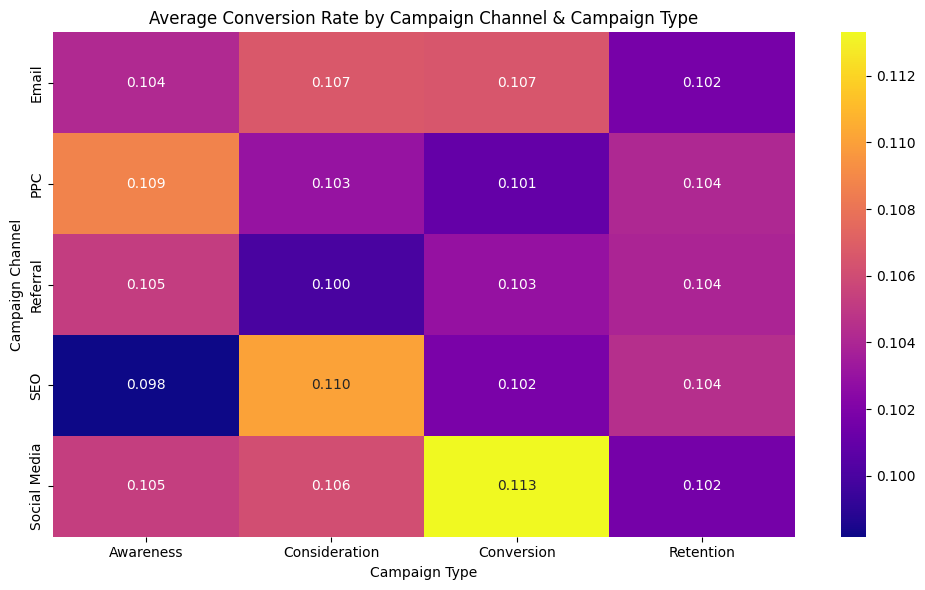

In [21]:
#heatmap: avg conversion rate by campaign channel & campaign type
#table of mean conversion rate
dm_p1 = dm_campaign.pivot_table(
    values='ConversionRate',
    index='CampaignChannel',
    columns='CampaignType',
    aggfunc='mean')
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dm_p1, annot=True, fmt=".3f", cmap="plasma")
plt.title("Average Conversion Rate by Campaign Channel & Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Campaign Channel")
plt.tight_layout()
plt.show()

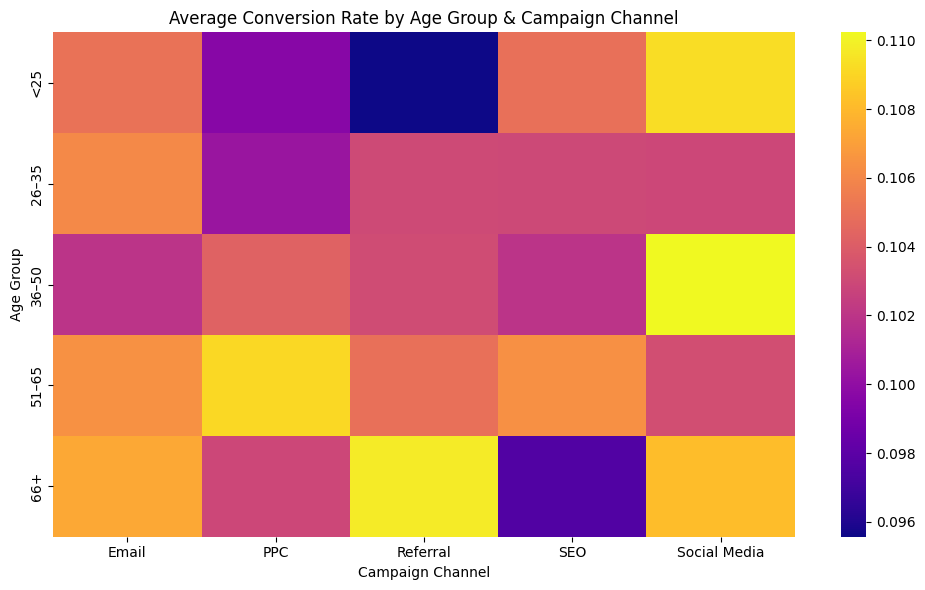

In [22]:
#heatmap: conversion rate by age group & campaign channel
#create age groups
dm_campaign['AgeGroup'] = pd.cut(dm_campaign['Age'], bins=[0, 25, 35, 50, 65, 80], labels=["<25", "26–35", "36–50", "51–65", "66+"])
#pivot table
dm_p2 = dm_campaign.pivot_table(
    values='ConversionRate',
    index='AgeGroup',
    columns='CampaignChannel',
    aggfunc='mean', 
    observed=False)
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dm_p2, fmt=".0f", cmap="plasma")
plt.title("Average Conversion Rate by Age Group & Campaign Channel")
plt.xlabel("Campaign Channel")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

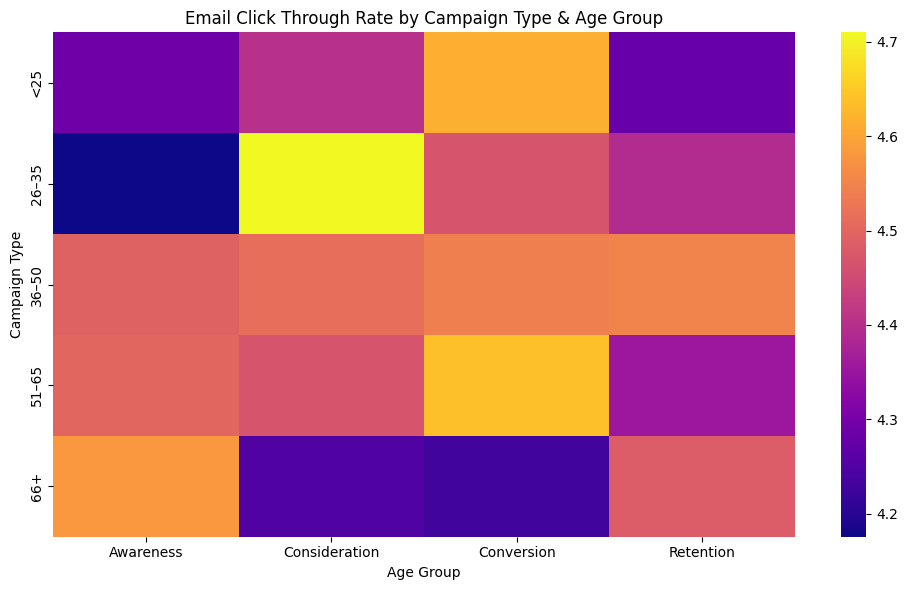

In [23]:
#heatmap: email ctr by campaign type & Age
dm_p3 = dm_campaign.pivot_table(
    values='EmailClicks',
    index='AgeGroup',
    columns='CampaignType',
    aggfunc='mean', 
    observed=False)
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dm_p3, fmt=".1f", cmap="plasma")
plt.title("Email Click Through Rate by Campaign Type & Age Group")
plt.xlabel("Age Group")
plt.ylabel("Campaign Type")
plt.tight_layout()
plt.show()

##### Bubble plots:

In [24]:
dm_campaign

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,AgeGroup
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,51–65
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,66+
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,36–50
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,26–35
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,51–65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,...,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0,<25
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,...,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0,36–50
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,...,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1,26–35
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,...,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1,<25


In [25]:
dm_campaign.select_dtypes(include='number').columns

Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion'],
      dtype='object')

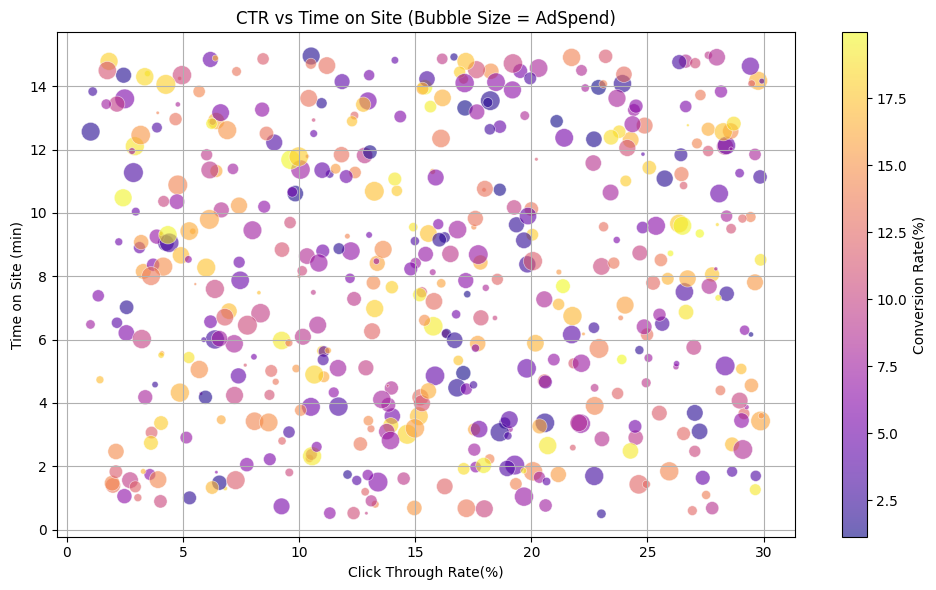

In [26]:
#taking sample of data for better visibility
dm_sample = dm_campaign.sample(n=500, random_state=42)
#bubble plot: ClickThroughRate vs  TimeOnSite, bubble = AdSpend
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    dm_sample['ClickThroughRate']*100,
    dm_sample['TimeOnSite'],    
    s=dm_sample['AdSpend']/50,  # scale down for plotting
    c=dm_sample['ConversionRate']*100,
    cmap='plasma',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5)
plt.xlabel('Click Through Rate(%)')
plt.ylabel('Time on Site (min)')
plt.title('CTR vs Time on Site (Bubble Size = AdSpend)')
cbar = plt.colorbar(scatter)
cbar.set_label('Conversion Rate(%)')
plt.grid(True)
plt.tight_layout()
plt.show()

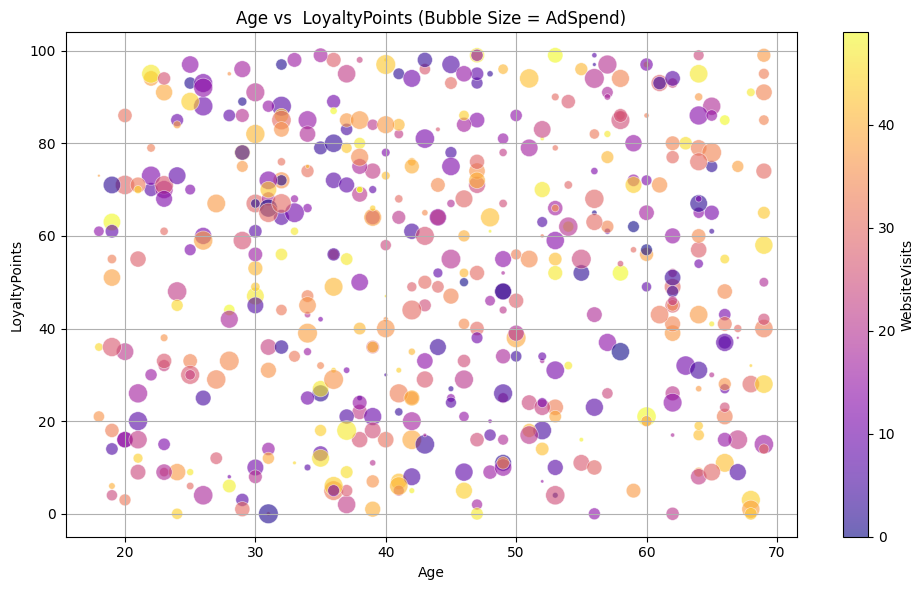

In [27]:
#bubble plot: Age vs  LoyaltyPoints, bubble = AdSpend
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    dm_sample['Age'],
    dm_sample['SocialShares'],    
    s=dm_sample['AdSpend']/50,  # scale down for plotting
    c=dm_sample['WebsiteVisits'],
    cmap='plasma',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5)
plt.xlabel('Age')
plt.ylabel('LoyaltyPoints')
plt.title('Age vs  LoyaltyPoints (Bubble Size = AdSpend)')
cbar = plt.colorbar(scatter)
cbar.set_label('WebsiteVisits')
plt.grid(True)
plt.tight_layout()
plt.show()

##### PCA:

In [28]:
#pca
num_cols_dm = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
    'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
dm_campaign_num = dm_campaign[num_cols_dm]
scaler=StandardScaler()
X_scaled = scaler.fit_transform(dm_campaign_num)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
exp_var = pca.explained_variance_ratio_
f_pc_var = explain_var[0]
print(f"Variance explained by first PCA: {f_pc_var * 100: .2f}%")

Variance explained by first PCA:  29.87%


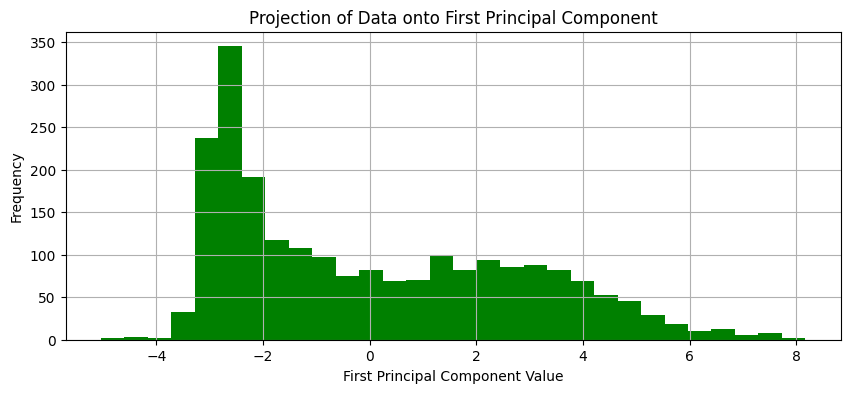

In [29]:
#plot projection onto first PC
f_pc_proj = X_pca[:, 0]
plt.figure(figsize=(10,4))
plt.hist(first_pc_proj, bins=30, color='green')
plt.title("Projection of Data onto First Principal Component")
plt.xlabel("First Principal Component Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [30]:
#loadings for each feature on each component
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=dm_campaign_num.columns  # original feature names
)

# Show top contributors to PC1
print("Top features contributing to PC1:")
print(loadings['PC1'].sort_values(key=abs, ascending=False).head(10))

Top features contributing to PC1:
ConversionRate       0.424146
PreviousPurchases   -0.392558
PagesPerVisit        0.386249
TimeOnSite           0.350177
WebsiteVisits       -0.350045
AdSpend             -0.281842
Income               0.268017
LoyaltyPoints       -0.232930
SocialShares         0.207986
EmailOpens          -0.100194
Name: PC1, dtype: float64


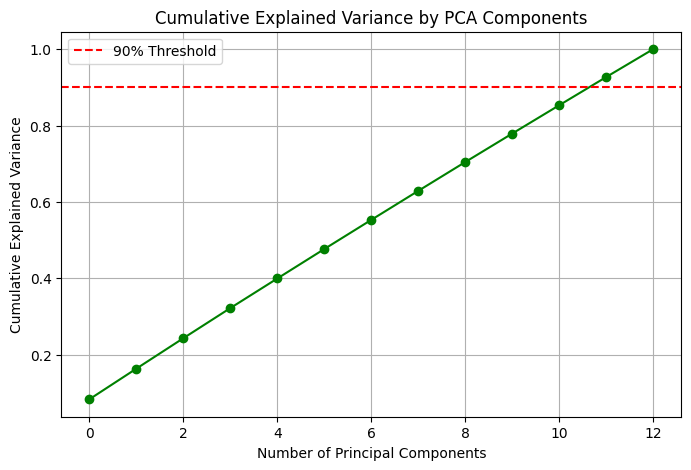

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(exp_var), marker='o', color='green')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')
plt.legend()
plt.show()

##### Linear Regression: (using different sets of features)

In [32]:
#Predict ConversionRate
features = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 
            'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
target = 'ConversionRate'
eng_fts = ['TimeOnSite', 'PagesPerVisit', 'WebsiteVisits']
mark_outreach = ['AdSpend', 'EmailOpens', 'EmailClicks', 'SocialShares']
customer_beh = ['PreviousPurchases', 'LoyaltyPoints', 'Age', 'Income']
def run_model(features, target='ConversionRate'):
    dm_clean = dm_campaign[features + [target]].dropna()
    X = dm_clean[features]
    y = dm_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"\n Features: {features}")
    print(f"R² Score: {r2:.4f}")
#run on engagement features
run_model(eng_fts)


 Features: ['TimeOnSite', 'PagesPerVisit', 'WebsiteVisits']
R² Score: -0.0010


In [33]:
#run on marketing outreach features
run_model(mark_outreach)


 Features: ['AdSpend', 'EmailOpens', 'EmailClicks', 'SocialShares']
R² Score: -0.0014


In [34]:
#run on customer behavior features
run_model(customer_beh)


 Features: ['PreviousPurchases', 'LoyaltyPoints', 'Age', 'Income']
R² Score: 0.0003


Answer:

Which features seem most likely to be useful to predict other features?
* TimeOnSite shows up consistently in both PCA and regression. This tells us that customers who spend more time and are more enagaged with the campaign are more likely to convert (likely to commit the desired action). 

##### Conclusions:
Are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!
* The data is usable.

Do you see any outliers? (Data points that are far from the rest of the data).
* Outliers present at the extremities.


Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?
* PCA shows that the data can be represented using ~4-10 principal component scores

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

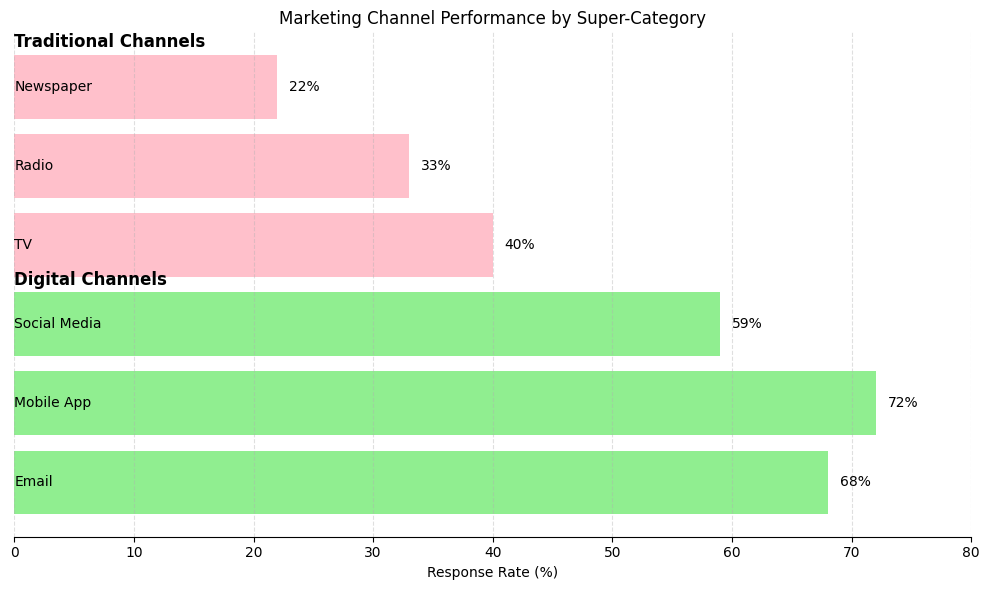

In [35]:
import matplotlib.pyplot as plt
#mock data
channels = [ "Email", "Mobile App", "Social Media",     # Digital Channels 
            "TV", "Radio", "Newspaper"                # Traditional Channels
]
response_rate = [68, 72, 59, 40, 33, 22]
category_labels = ["Digital Channels"] * 3 + ["Traditional Channels"] * 3

#define positions and spacing
positions = list(range(len(channels)))
bar_colors = ['lightgreen'] * 3 + ['pink'] * 3

#plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(positions, response_rate, color=bar_colors)

#add category labels
for i, (pos, label) in enumerate(zip(positions, channels)):
    plt.text(0, pos, label, va='center', ha='left', fontsize=10)

#add values at the end of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f"{response_rate[i]}%", va='center', fontsize=10)

#add super-category annotations
plt.text(0, 2.5, "Digital Channels", fontsize=12, weight='bold')
plt.text(0, 5.5, "Traditional Channels", fontsize=12, weight='bold')

#formatting
plt.yticks([])  # Hide y-axis ticks
plt.xlabel("Response Rate (%)")
plt.title("Marketing Channel Performance by Super-Category")
plt.xlim(0, 80)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.tight_layout()
plt.show()
